In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv(r'c:\Users\Utsav\Downloads\titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [6]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [9]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2)

In [11]:
model=DecisionTreeClassifier()

In [12]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
model.score(x_test,y_test)

0.6293706293706294

In [16]:
cross_val_score(model,df.drop('Survived',axis=1),df['Survived'],cv=5,scoring="accuracy").mean()

0.6260415640697332

In [17]:
k_age=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
k_fare=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')

In [19]:
trf=ColumnTransformer([
    ('first',k_age,[0]),
    ('second',k_fare,[1])
])

In [20]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [23]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.925 ,  12.875 ,  26.    ,  50.4958, 512.3292])],
      dtype=object)

In [24]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [25]:
output

,age,age_trf,fare,fare_trf
819,10.0,0.0,27.9000,3.0
57,28.5,2.0,7.2292,0.0
873,47.0,4.0,9.0000,1.0
670,40.0,3.0,39.0000,3.0
373,22.0,1.0,135.6333,4.0
...,...,...,...,...
164,1.0,0.0,39.6875,3.0
9,14.0,0.0,30.0708,3.0
607,27.0,2.0,30.5000,3.0
775,18.0,1.0,7.7500,0.0


In [27]:
output['age_labels'] = pd.cut(x=x_train['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [28]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
819,10.0,0.0,27.9000,3.0,"(0.42, 18.0]","(26.0, 50.496]"
57,28.5,2.0,7.2292,0.0,"(25.0, 31.0]","(0.0, 7.925]"
873,47.0,4.0,9.0000,1.0,"(41.0, 80.0]","(7.925, 12.875]"
670,40.0,3.0,39.0000,3.0,"(31.0, 41.0]","(26.0, 50.496]"
373,22.0,1.0,135.6333,4.0,"(18.0, 25.0]","(50.496, 512.329]"
...,...,...,...,...,...,...
164,1.0,0.0,39.6875,3.0,"(0.42, 18.0]","(26.0, 50.496]"
9,14.0,0.0,30.0708,3.0,"(0.42, 18.0]","(26.0, 50.496]"
607,27.0,2.0,30.5000,3.0,"(25.0, 31.0]","(26.0, 50.496]"
775,18.0,1.0,7.7500,0.0,"(0.42, 18.0]","(0.0, 7.925]"


In [36]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(df.drop('Survived',axis=1))
    print(np.mean(cross_val_score(DecisionTreeClassifier(),df.drop('Survived',axis=1),df.Survived,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(df['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(df['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6303012519561815


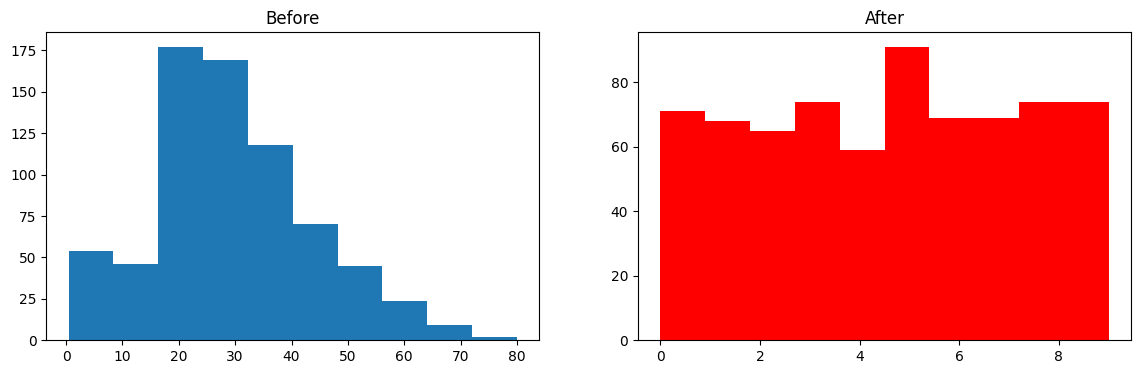

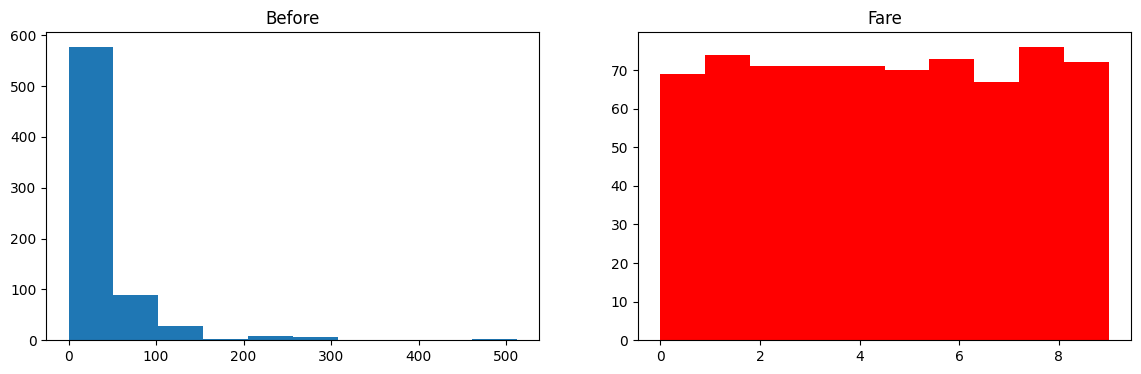

In [37]:
discretize(10,'quantile')

Binarization